In [1]:
MCView::import_dataset(
    project="mouse_atlas_2303",
    dataset="emb_exe",
    title="Mouse Atlas 03/2023",
    anndata_file="/home/aviezerl/proj/MCV/rename/mouse/metacells_new_perserve_umap.h5ad",
)

i Importing emb_exe

i Reading /home/aviezerl/proj/MCV/rename/mouse/metacells_new_perserve_umap.h5ad

i Processing metacell matrix

i Processing 2d projection

i Calculating top genes per metacell (marker genes)

i Calculating metacell correlations of default marker genes

i Processing inner-folds matrix

i Calculating top inner-fold genes

i Add the "Inner-fold" tab to your config file to view the inner-fold matrix

i Taking cell type annotations from cluster field in the anndata object

i Generating cell type colors using chameleon package.

i Coloring using pre-calculated 3D umap

i Clustering in order to get gene modules. k = 31

i Number of genes considered = 1000

i Loading previously calculated 30 correlated and anti-correlated genes for each gene

v emb_exe dataset imported succesfully to mouse_atlas_2303 project

* You can now run the app using: run_app("mouse_atlas_2303")

* or create a bundle using: create_bundle("mouse_atlas_2303", name =
"name_of_bundle")



In [2]:
MCView::create_bundle(
  project = "mouse_atlas_2303",
  path = "/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/mm_gastru/",
  name = "mouse_atlas_2303",
  self_contained = TRUE,
  branch = NULL,
  overwrite = TRUE,
  permissions = "777",
#   light_version = TRUE
)

* Removing previous bundle (overwrite = TRUE)

> Creating a self-contained bundle

* Adding a file called restart.txt

* Changing permissions to 777

* Bundle files:



/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/mm_gastru/mouse_atlas_2303
+-- app.R
+-- code
|   +-- DESCRIPTION
|   +-- Dockerfile
|   +-- LICENSE
|   +-- LICENSE.md
|   +-- NAMESPACE
|   +-- NEWS.md
|   +-- R
|   |   +-- MCView-package.R
|   |   +-- app_config.R
|   |   +-- app_modals.R
|   |   +-- app_server.R
|   |   +-- app_ui.R
|   |   +-- atlas_projection.R
|   |   +-- cell_types.R
|   |   +-- cluster.R
|   |   +-- gene_names.R
|   |   +-- golem_utils_server.R
|   |   +-- golem_utils_ui.R
|   |   +-- import.R
|   |   +-- import_metacell1.R
|   |   +-- metadata.R
|   |   +-- mod_about.R
|   |   +-- mod_annotate.R
|   |   +-- mod_atlas.R
|   |   +-- mod_cell_type.R
|   |   +-- mod_flow.R
|   |   +-- mod_gene_mc.R
|   |   +-- mod_gene_modules.R
|   |   +-- mod_inner_fold.R
|   |   +-- mod_manifold.R
|   |   +-- mod_markers.R
|   |   +-- mod_mc_mc.R
|   |   +-- mod_outliers.R
|   |   +-- mod_proj_fold.R
|   |   +-- mod_query.R
|   |   +-- mod_samples.R
|   |   +-- outliers.R
|   |

v created a bundle at /net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/mm_gastru/mouse_atlas_2303

* To deploy to shinyapps.io, run: rsconnect::deployApp(appDir =
"/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/mm_gastru/mouse_atlas_2303")

* To deploy to another shiny-server service, upload
/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/mm_gastru/mouse_atlas_2303 to
the service.



In [11]:
inner_variance_fold_mat = adata$layers[["inner_variance_fold"]]

In [1]:
adata = anndata::read_h5ad("../oc_mm_gastru/output/scrna_db/oc_atlas_new_filtered.h5ad")

In [5]:
adata

AnnData object with n_obs <U+00D7> n_vars = 3584 <U+00D7> 26919
    obs: 'total_umis', 'grouped', '__zeros_downsample_umis', 'u', 'v', 'w', 'x', 'y'
    var: 'properly_sampled_gene', 'excluded_gene', 'clean_gene', 'full_gene_index', 'related_genes_module', 'rare_gene', 'rare_gene_module', 'lateral_gene', 'bursty_lonely_gene', 'marker_gene', 'gene_entropy', 'feature_gene', 'top_feature_gene'
    uns: 'excluded_cells', 'excluded_genes', 'mcview_format', 'metacells_algorithm', 'outliers'
    layers: 'inner_fold', 'inner_variance_fold', 'total_umis', 'zeros'
    obsp: 'new_mdata.obs', 'obs_balanced_ranks', 'obs_outgoing_weights', 'obs_pruned_ranks', 'umap_distances'
    varp: 'var_similarity'

In [2]:
inner_fold_mat = adata$layers[["inner_fold"]]

In [32]:
test

,AAGAB,AARS,AARS1_hg19,ABCE1,ABCF1,ABCF2,ABHD12,ABLIM1,ABRA,ABRACL,⋯,hotspot99215,hotspot99279,hotspot9937,hotspot9969,hotspot99708,hotspot99716,hotspot99795,hotspot99841,hotspot99949,hotspot99963
M0.11,0.000000,0.000000,0,1.3432417,-1.453316,0.000000,0,0.000000,0,0.000000,⋯,0.000000,-1.768072,0,0,0,0,1.717302,0.000000,-1.950642,0.000000
M1.79,0.000000,0.000000,0,-2.0706453,-1.895647,-1.173933,0,0.000000,0,0.000000,⋯,0.000000,-1.616532,0,0,0,0,0.000000,0.000000,1.764691,0.000000
M2.43,0.000000,0.000000,0,-1.5210842,1.515221,0.000000,0,0.000000,0,-1.617126,⋯,-1.904766,-1.850150,0,0,0,0,-3.106444,-1.705893,-1.928141,0.000000
M3.55,0.000000,0.000000,0,-1.5884566,0.000000,1.627928,0,0.000000,0,0.000000,⋯,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000
M4.49,0.000000,1.798293,0,-1.2996798,-1.778057,0.000000,0,0.000000,0,0.000000,⋯,0.000000,-1.862668,0,0,0,0,-2.731158,0.000000,-2.851088,0.000000
M5.57,0.000000,0.000000,0,-2.0871625,-1.643955,-1.420297,0,0.000000,0,0.000000,⋯,0.000000,1.671793,0,0,0,0,0.000000,0.000000,-1.411671,0.000000
M6.52,0.000000,0.000000,0,1.1797111,0.000000,0.000000,0,0.000000,0,-1.550318,⋯,0.000000,-1.987545,0,0,0,0,0.000000,0.000000,-1.925135,0.000000
M7.40,0.000000,0.000000,0,-2.2491980,0.000000,-1.463885,0,0.000000,0,0.000000,⋯,0.000000,-1.637943,0,0,0,0,0.000000,0.000000,-2.200965,0.000000
M8.46,0.000000,0.000000,0,-2.2504611,-1.806974,-1.341095,0,0.000000,0,-1.690434,⋯,1.627829,-2.100867,0,0,0,0,0.000000,1.889718,-2.428806,1.485537
M9.08,0.000000,2.127205,0,-1.9277893,-1.515289,-1.659980,0,-1.403063,0,-1.380629,⋯,0.000000,1.437246,0,0,0,0,0.000000,-1.492471,1.810451,1.435614


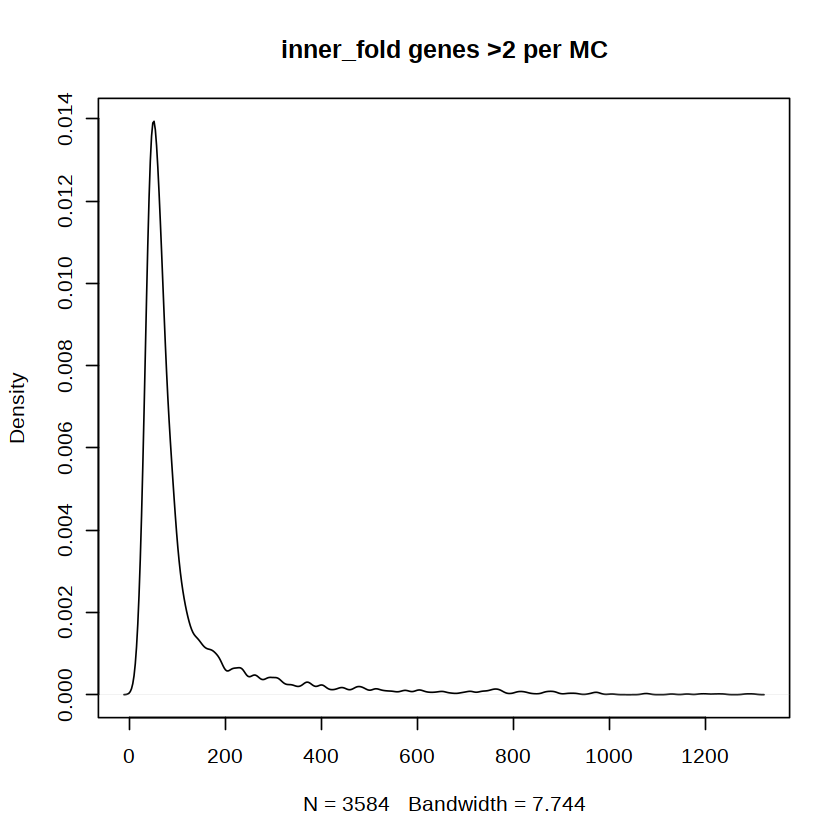

In [33]:
test = as.matrix(inner_fold_mat[,Matrix::colSums(inner_fold_mat>2) > 0])
plot(density(rowSums(test>0)), main="inner_fold genes >2 per MC")

In [4]:
max_mc_inner_fold = apply(inner_fold_mat,1,max)

In [5]:
# options(repr.plot.width=6, repr.plot.height=3)
pdf("mc_max_inner_fold.pdf", width=6, height=3)
hist(max_mc_inner_fold)
abline(v=3, linetype='dotted', col='red')
dev.off()

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
""linetype" is not a graphical parameter"


png 
  2

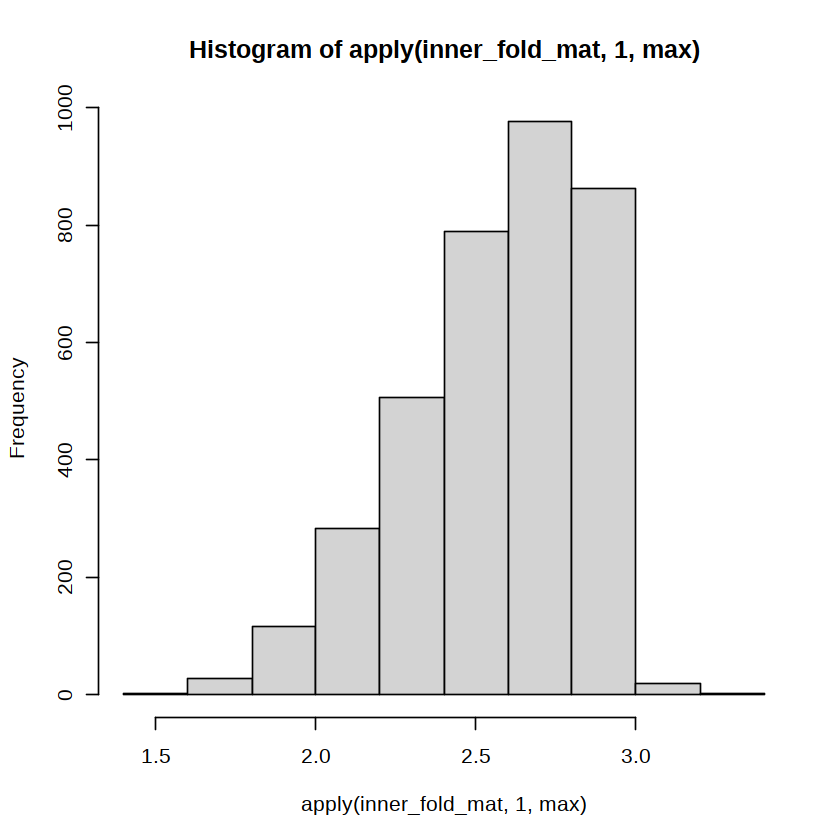

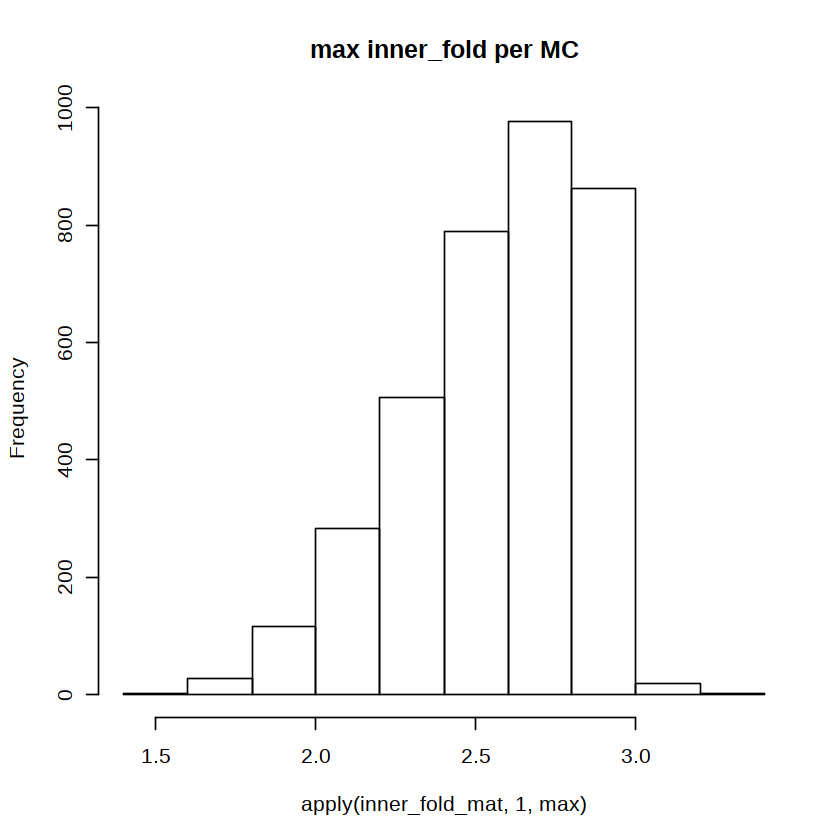

In [8]:
plot(hist(), main="max inner_fold per MC")

In [14]:
quantile(rowSums(test))

0%         25%         50%         75%        100% 
-136.792019   -1.842188    0.000000    0.000000  643.906073

In [12]:
test2 = as.matrix(inner_variance_fold_mat[,Matrix::colSums(inner_variance_fold_mat) > 0])
plot(density(rowSums(test2)), main="inner_variance_fold genes > 0 per MC")

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 3.0 GiB"


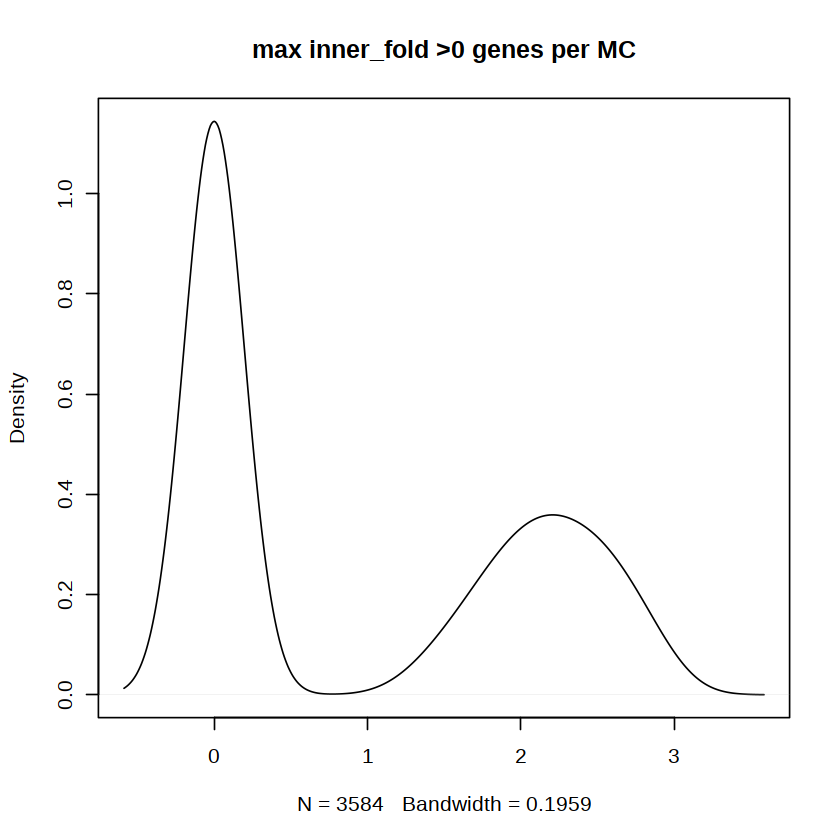

In [24]:
plot(density(apply(test,1,max)), main="max inner_fold >0 genes per MC")

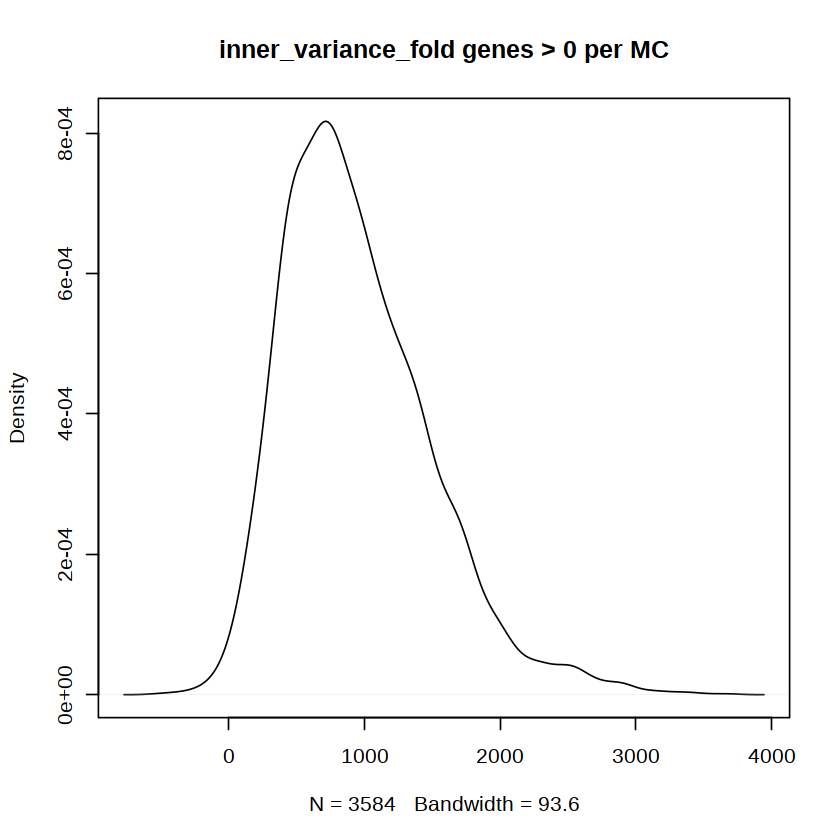

In [ ]:
mc_fp <- get_mc_data(dataset, "inner_fold_mat")
req(mc_fp)
mc_fp <- as.matrix(mc_fp[Matrix::rowSums(mc_fp) > 0, ])

In [1]:
MCView::import_dataset(
    project="rabbit_atlas_2303",
    dataset="oc_embexe",
    title="Rabbit Atlas 03/2023",
    anndata_file="../oc_mm_gastru/output/scrna_db/oc_atlas_new_filtered.h5ad",
)

i Importing oc_embexe

i Reading ../oc_mm_gastru/output/scrna_db/oc_atlas_new_filtered.h5ad

i Processing metacell matrix

i Processing 2d projection

i Calculating top genes per metacell (marker genes)

i Calculating metacell correlations of default marker genes

i Processing inner-folds matrix

i Calculating top inner-fold genes

i Add the "Inner-fold" tab to your config file to view the inner-fold matrix

i Clustering in order to get initial annotation.

i using 765 genes

i clustering k = 64

i number of features = 765

i Generating cell type colors using chameleon package.

i Coloring using pre-calculated 3D umap

i Clustering in order to get gene modules. k = 31

i Number of genes considered = 1000

i Loading previously calculated 30 correlated and anti-correlated genes for each gene

v oc_embexe dataset imported succesfully to rabbit_atlas_2303 project

* You can now run the app using: run_app("rabbit_atlas_2303")

* or create a bundle using: create_bundle("rabbit_atlas_2303", n

In [3]:
MCView::create_bundle(
  project = "rabbit_atlas_2303",
  path = "/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/oc_gastru/",
  name = "rabbit_atlas_2303_light",
  self_contained = TRUE,
  branch = NULL,
  overwrite = TRUE,
  permissions = "777",
  light_version = TRUE
)

* Removing previous bundle (overwrite = TRUE)

> Creating a self-contained bundle

> Creating a light version of the bundle. Excluded tabs: Gene modules, Annotate, Inner-fold. To change this, edit the project/config.yaml file.

* Adding a file called restart.txt

* Changing permissions to 777

* Bundle files:



/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/oc_gastru/rabbit_atlas_2303_light
+-- app.R
+-- code
|   +-- DESCRIPTION
|   +-- Dockerfile
|   +-- LICENSE
|   +-- LICENSE.md
|   +-- NAMESPACE
|   +-- NEWS.md
|   +-- R
|   |   +-- MCView-package.R
|   |   +-- app_config.R
|   |   +-- app_modals.R
|   |   +-- app_server.R
|   |   +-- app_ui.R
|   |   +-- atlas_projection.R
|   |   +-- cell_types.R
|   |   +-- cluster.R
|   |   +-- gene_names.R
|   |   +-- golem_utils_server.R
|   |   +-- golem_utils_ui.R
|   |   +-- import.R
|   |   +-- import_metacell1.R
|   |   +-- metadata.R
|   |   +-- mod_about.R
|   |   +-- mod_annotate.R
|   |   +-- mod_atlas.R
|   |   +-- mod_cell_type.R
|   |   +-- mod_flow.R
|   |   +-- mod_gene_mc.R
|   |   +-- mod_gene_modules.R
|   |   +-- mod_inner_fold.R
|   |   +-- mod_manifold.R
|   |   +-- mod_markers.R
|   |   +-- mod_mc_mc.R
|   |   +-- mod_outliers.R
|   |   +-- mod_proj_fold.R
|   |   +-- mod_query.R
|   |   +-- mod_samples.R
|   |   +-- outliers.

v created a bundle at /net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/oc_gastru/rabbit_atlas_2303_light

* To deploy to shinyapps.io, run: rsconnect::deployApp(appDir =
"/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/oc_gastru/rabbit_atlas_2303_light")

* To deploy to another shiny-server service, upload
/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/oc_gastru/rabbit_atlas_2303_light
to the service.

